In [2]:
import numpy as np
import os
import pandas as pd
import scipy   
from scipy import stats
from matplotlib import gridspec
import matplotlib.pyplot as plt

def format_axis(ax):   
    for pos in ['right', 'top', 'left']:
        ax.spines[pos].set_edgecolor('white')    
    ax.tick_params(axis='x', length=6, width=2, colors='black')
    ax.tick_params(axis='y', length=6, width=2, colors='black') 
  
def getLogBinnedDistribution(x, y, nbins):
    bins   = 10 ** np.linspace(np.log10(min(x)), np.log10(max(x)), nbins)  
    values = [ np.mean([y[j]  for j in range(len(x)) if x[j] >= bins[i] and x[j] < bins[i+1]])  for i in range(nbins-1)]    
    error  = [ np.std( [y[j]  for j in range(len(x)) if x[j] >= bins[i] and x[j] < bins[i+1]])  for i in range(nbins-1)]
    bins   = (bins[1:] + bins[:-1])/2
    return bins, values, error

def getDistribution(keys, normalized = True):   
    uniq_keys = np.unique(keys)
    bins = uniq_keys.searchsorted(keys)
    distr = np.bincount(bins) 
    if normalized == 1: distr = distr/float(np.sum(distr)) 
    return np.asarray(uniq_keys.tolist()), np.asarray(distr.tolist())    
     
def getPercentileBinnedDistribution(x, y, nbins):
    x, y = zip(*sorted(zip(x, y), key=lambda tup: tup[0]))
    elements_per_bin = int(len(x)/float(nbins))
    xx  = [np.mean(x[i*elements_per_bin:(i+1)*elements_per_bin]) for i in range(nbins)]
    yy  = [np.mean(y[i*elements_per_bin:(i+1)*elements_per_bin]) for i in range(nbins)]
    std = [np.std(y[i*elements_per_bin:(i+1)*elements_per_bin])  for i in range(nbins)]
    return xx, yy, std

def getBinnedDistribution(x, y, nbins):
    x = np.asarray(x)
    y = np.asarray(y)
    n, bins   = np.histogram(x, bins=nbins)
    sy, _  = np.histogram(x, bins=nbins, weights=y)
    sy2, _ = np.histogram(x, bins=nbins, weights=y*y)
    mean = sy/n
    std  = np.sqrt(sy2/n - mean*mean) 
    bins = (_[1:] + _[:-1])/2
    return bins, mean, std

def get_cleaned_rankings(toplists):
    ranking_name = {}
    for year in toplists:
        for line in open('Data/djrankings_cleaned/' + year):
            rank, name = line.strip().split('\t')
            if name not in ranking_name:
                ranking_name[name] = [(int(year), int(rank))]
            else:
                ranking_name[name].append((int(year), int(rank)))
        for n, r in ranking_name.items():
            r = sorted_by_second = sorted(r, key=lambda tup: tup[0])
            ranking_name[n] = r   
    return ranking_name
    
    
rankings   = get_cleaned_rankings(os.listdir('Data/djrankings_cleaned'))
labelfont  = 20
tickfont   = 16
legendfont = 14

In [3]:
### defining colors

color_b   = '#80b1d3'
color_r   = '#fb8072'
color_g   = '#8dd3c7'
colors_nw = ['#AED3FD', '#ffffb3', '#bebada', '#fb8072', '#80b1d3', '#fdb462', '#b3de69']

colors_comms = {
    'Sasha & Tiësto community'                             :   '#AED3FD',# '#8dd3c7' ,
    'Carl Cox community'                                   :   '#ffffb3' ,
    'David Guetta community'                               :   '#bebada',
    'Paul van Dyk & John Digweed community'                :   '#fb8072',
    'Armin Van Buuren & Paul Oakenfold community'          :   '#fdb462',
    'Martin Garrix & Dimitri Vegas & Like Mike community'  :   '#b3de69' , 
    'Hardwell community'                                   :   '#80b1d3'
}

# FIGURE 1

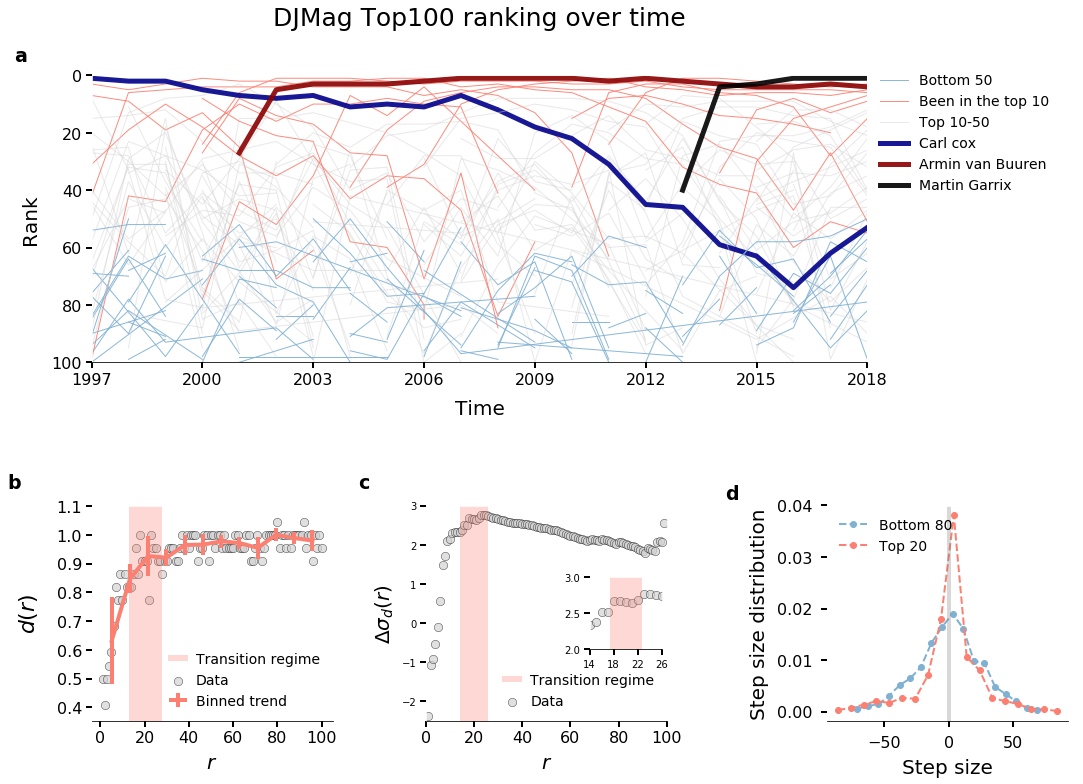

In [50]:
def get_plot_a(ax, xpos, ypos):

    i = 0
    j = 0
    k = 0

    b_newentry  = []
    b_droput    = []
    b_reentry   = []
    b_fromstart = []

    for name, rdata in rankings.items():

        x, y = zip(*rdata)
        best = min(y)

        width = 1

        if best < 11 and i < 16:
            color = color_r
            alpha_ = 0.9
            if i == 0: ax.plot(x, y, color = color, alpha = alpha_, linewidth = width, label = 'Been in the top 10')
            else:      ax.plot(x, y, color = color, alpha = alpha_, linewidth = width)
            i += 1
        
        elif best > 49 and j < 151:
            color = color_b
            alpha_ = 0.9
            if j == 0: ax.plot(x, y, color = color, alpha = alpha_, linewidth = width, label = 'Bottom 50')
            else:      ax.plot(x, y, color = color, alpha = alpha_, linewidth = width)
            j += 1
          
        elif k < 101:
            color = 'lightgrey'
            alpha_ = 0.5
            if k == 0: ax.plot(x, y, color = color, alpha = alpha_, linewidth = width, label = 'Top 10-50')
            else:      ax.plot(x, y, color = color, alpha = alpha_, linewidth = width)
            k += 1       
            
        if 'Armin Van Buuren' in name:
            ax.plot(x, y, color = 'darkred', alpha = 0.9, linewidth = 5, label = 'Armin van Buuren') 
        if 'Carl Cox' in name:
            ax.plot(x, y, color = 'darkblue', alpha = 0.9, linewidth = 5, label = 'Carl cox')            
        if 'Martin Garrix' in name:
            ax.plot(x, y, color = 'k', alpha = 0.9, linewidth = 5, label = 'Martin Garrix')            

    ax.set_ylim([100,0])
    ax.set_xlabel('Time', fontsize = labelfont, labelpad = 12)
    ax.set_ylabel('Rank', fontsize = labelfont, labelpad  = 12)
    plt.tick_params(axis='both', which='major', labelsize=tickfont, pad = 8)
    ax.set_title('DJMag Top100 ranking over time', fontsize = 25, pad = 50)
    
    ax.legend(bbox_to_anchor=(xpos, ypos), fontsize = legendfont, ncol = 1, frameon = False)
    format_axis(ax)
    ax.set_xlim([1997, 2018])
    for tick in ax.xaxis.get_major_ticks(): tick.label.set_fontsize(tickfont)          
    for tick in ax.yaxis.get_major_ticks(): tick.label.set_fontsize(tickfont)       


def get_plot_d(ax):
    
    x, y = zip(*[  [float(fff) for fff in line.strip().split('\t')] for line in open('Data/Figure1_entryranks_bottom.dat')])
    ax.plot(x, y, 'o--', linewidth = 2, color = color_b, label = 'Bottom 80')
    x_b, y_b = zip(*[(x[i], y[i]) for i in range(len(x)) ])
    
    x, y = zip(*[  [float(fff) for fff in line.strip().split('\t')] for line in open('Data/Figure1_entryranks_top.dat')])
    ax.plot(x, y, 'o--', linewidth = 2, color = color_r, label = 'Top 20')    
    ax.set_xlabel('Step size', fontsize = labelfont, labelpad = 8)   
    ax.set_ylabel('Step size distribution', fontsize = labelfont, labelpad = 8)   
    
    ax.legend(loc = 'upper left', fontsize = legendfont, frameon = False)

    x_t, y_t = zip(*[(x[i], y[i]) for i in range(len(x))])
    ax.axvline(x=0,color = 'grey', alpha = 0.3, linewidth = 4)
    format_axis(ax)
    for tick in ax.xaxis.get_major_ticks(): tick.label.set_fontsize(tickfont)    
    for tick in ax.yaxis.get_major_ticks(): tick.label.set_fontsize(tickfont)       

    
def get_plot_b(ax, lims, tipus, title, labelpad):
    
    x, y = zip(*[  [float(fff) for fff in line.strip().split('\t')] for line in open('Data/Figure1_ratio_'+tipus+'.dat')]) 
    y = [yy/22.0 for yy in y]    
        
    ax.scatter(x,y, color = 'lightgrey', alpha = 0.7, s = 70, edgecolor = 'k', linewidths = 0.5, label = 'Data')
    nbins = 12
    bx, by, yerr = getBinnedDistribution(x, y, nbins)
    ax.errorbar(bx, by, yerr= yerr, color = color_r, linewidth = 4, label = 'Binned trend')
    format_axis(ax)
    
    ax.set_xlabel('$r$', fontsize = labelfont, labelpad = 8)
    ax.set_ylabel(title, fontsize = labelfont+2, labelpad = labelpad)
    
    if tipus == 'diversity':   ax.axvline(20, color = color_r, linewidth=33, alpha = 0.3, label = 'Transition regime') 
    else:   ax.axvline(16, color = color_r, linewidth=28, alpha = 0.3, label = 'Transition regime')     
    leg = ax.legend(loc = 'bottom right', fontsize = legendfont, frameon = False, handlelength = 1 )
    for legobj in leg.legendHandles[0:1]:
        legobj.set_linewidth(6.0)
    for tick in ax.xaxis.get_major_ticks(): tick.label.set_fontsize(tickfont)       
    for tick in ax.yaxis.get_major_ticks(): tick.label.set_fontsize(tickfont)       

        
        
def get_plot_c(ax, tipus, addition, xlim, ylim, width_ = 70, legend = True, off = False, labels = True):
    
    x, y = zip(*[  [float(fff) for fff in line.strip().split('\t')] for line in open('Data/Figure1_top_'+tipus+'.dat')])
      
    ax.scatter(x,y, color = 'lightgrey', alpha = 0.7, s = 70, edgecolor = 'k', linewidths = 0.5, label = 'Data')
    if labels: ax.set_xlabel('$r$', fontsize = labelfont, labelpad = 8)
    if labels:
        if addition == 'd':
            if not off:  ax.set_ylabel('$\Delta\sigma_d(r)$', fontsize = labelfont, labelpad = 6)  
        else:
            if not off:  ax.set_ylabel('$\Delta\sigma_f(r)$', fontsize = labelfont, labelpad = 6)   

    
    if tipus == 'diversity': ax.axvline(20, color = color_r, linewidth=width_, alpha = 0.3, label = 'Transition regime')    
    else:                    ax.axvline(16, color = color_r, linewidth=width_, alpha = 0.3, label = 'Transition regime')       

    format_axis(ax)
    if legend:
        leg = ax.legend(loc = 'bottom right', fontsize = legendfont, frameon = False, handlelength = 1 )
        for legobj in leg.legendHandles[0:1]:
            legobj.set_linewidth(6.0)
        for tick in ax.xaxis.get_major_ticks(): tick.label.set_fontsize(tickfont)          
        
    ax.set_ylim(ylim)
    ax.set_xlim(xlim)
    



       
        


fig = plt.figure(constrained_layout=False, figsize = (15,11))


gs = gridspec.GridSpec(9, 15)
ax1 = fig.add_subplot(gs[0:4, 0:12])
ax_ = fig.add_subplot(gs[5, :])
ax_.axis('off')


ax2 = fig.add_subplot(gs[6:, 0:4])
ax3 = fig.add_subplot(gs[6:, 5:9])


ax4 = fig.add_subplot(gs[6:, 11:])

get_plot_a(ax1, 1.0, 1.05)
get_plot_b(ax2 , [4, 13.5], 'diversity', '$d(r)$', 16)
#get_plot_c(ax3 ,  'diversity', 'd')
get_plot_d(ax4)




#left, bottom, width, height = [0.7, 0.4, 0.2, 0.2]
#ax22 = ax3.add_axes([left, bottom, width, height])




get_plot_c(ax3 ,  'diversity', 'd', [0,100], [-2.5, 3], width_ = 28)

inset_axes = inset_axes(ax3, width="30%", height=1., loc=7)
get_plot_c(inset_axes ,  'diversity', 'd', [14,26], [2,3], width_ = 32, legend = False, labels = False)
inset_axes.set_xticks([14, 18, 22, 26])





ax1.annotate("a", xy=(-0.10, 1.05), xycoords="axes fraction", fontsize = 19,  weight="bold")
ax2.annotate("b", xy=(-0.35, 1.08), xycoords="axes fraction", fontsize = 19,  weight="bold")
ax3.annotate("c", xy=(-0.28, 1.08),  xycoords="axes fraction", fontsize = 19,  weight="bold")
ax4.annotate("d", xy=(-0.42, 1.03), xycoords="axes fraction", fontsize = 19,  weight="bold")
ax1.set_xticks(np.arange(1997, 2019,3))

plt.tight_layout()
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.65, hspace=0)

plt.savefig('Figures/Figure1.pdf',bbox_inches="tight") 

# FIGURE 2

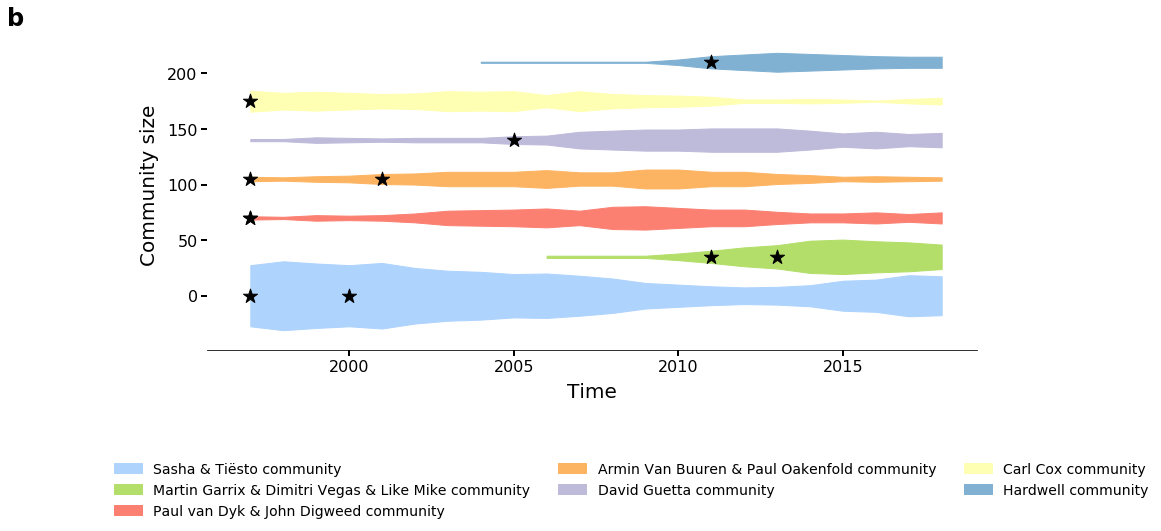

In [4]:
def community_plots(ax, xpos):
      
    comms_tops = {}
    for line in open('DataSI/communities_bests.dat'):
        comm, name, year = line.strip().split('\t')
        if comm not in comms_tops:
            comms_tops[comm] = []
        comms_tops[comm].append((name, int(year)))

    sizes  = {}
    files  = [f for f in os.listdir('Data') if 'Figure2_cumminitysize_' in f]
    labels = []
    
    for ind, fn in enumerate(files):
        title = fn.split('_')[2]
        x, y = zip(*[  [float(fff) for fff in line.strip().split('\t')] for line in open('Data/' + fn)])

        mean = 35*ind
        ax.fill_between(x, mean + np.asarray(y)/2, mean +  -1*np.asarray(y)/2, color = colors_comms[title], label = title)  
        labels.append(title)
    
        sizes[title] = y
        
        for jind, tops in enumerate(comms_tops[title]):
            if jind == 0: 
                ax.scatter(tops[1], mean, marker = '*', s = 220, color = 'k')
            else:
                ax.scatter(tops[1], mean, marker = '*', s = 220, color = 'k')
   
    format_axis(ax)
    for tick in ax.xaxis.get_major_ticks(): tick.label.set_fontsize(tickfont)     
    for tick in ax.yaxis.get_major_ticks(): tick.label.set_fontsize(tickfont)       

    return sizes    
    
    

f, ax = plt.subplots(1,1,figsize=(12,5.7))

sizes = community_plots(ax, 1.5)
ax.set_xlabel('Time',           fontsize = labelfont, labelpad = 8)
ax.set_ylabel('Community size', fontsize = labelfont, labelpad = 8)
plt.tight_layout()
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.5, hspace=0)

ax.set_ylim([-49,249])
ax.legend(bbox_to_anchor=(1.24, -0.3), frameon = False, fontsize = legendfont, ncol = 3)

ax.annotate("b", xy=(-0.26 ,0.98), xycoords="axes fraction", fontsize = 24,     weight="bold")

plt.savefig('Figures/Figure2.pdf',bbox_inches="tight") 

# FIGURE 3

No handles with labels found to put in legend.


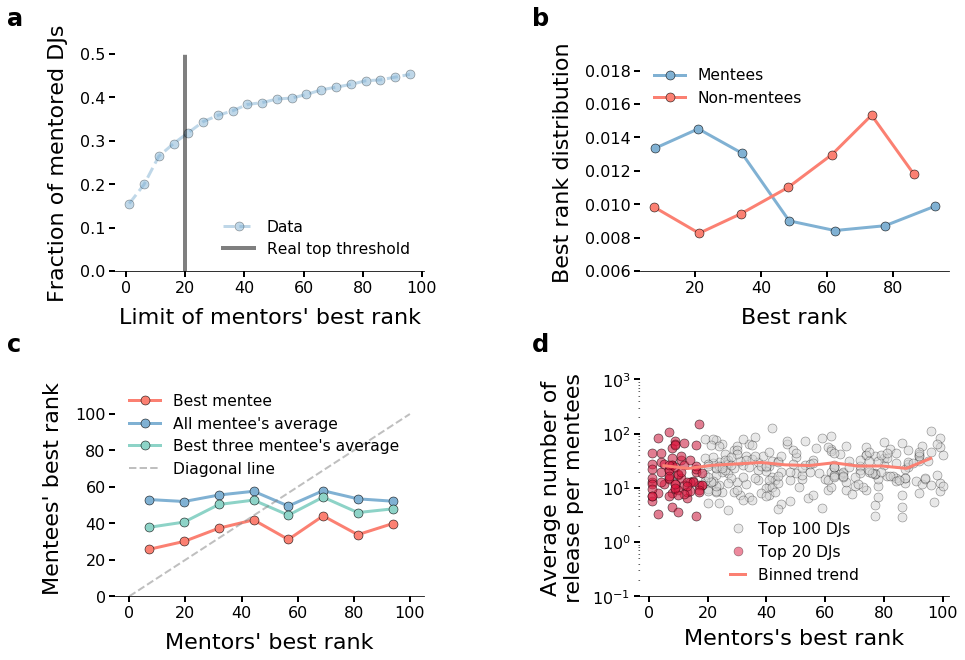

In [5]:
def plot_mentored_fraction(ax):  
    x, y = zip(*[[float(a) for a in line.strip().split('\t')] for line in open('Data/Figure3_mentored.dat')])  
    y_c  = [sum(y[i:]) for i in range(len(y))]

    summ = max(y)
    y_c = [yy/summ for yy in y_c]
    
    ax.plot(range(1,100)[0::5], y[0::5], 'o--', markersize = MARKERS, color = color_b, alpha = 0.5, markeredgewidth = 0.5, markeredgecolor = 'k', linewidth = LINEW, label = 'Data')
    bx, by, y = getLogBinnedDistribution(range(1,100), y, 8)
    ax.set_xlabel('Limit of mentors\' best rank', fontsize = labelfont, labelpad = 12)
    ax.set_ylabel('Fraction of mentored DJs', fontsize = labelfont, labelpad = 12)
    format_axis(ax)
    ax.set_ylim([0,0.5])
    ax.axvline(x=20, color = 'k', linewidth = 4, alpha = 0.5, label = 'Real top threshold')
    ax.legend(loc = 'lower right', fontsize = legendfont, frameon = False)   
    for tick in ax.xaxis.get_major_ticks(): tick.label.set_fontsize(tickfont)     
    for tick in ax.yaxis.get_major_ticks(): tick.label.set_fontsize(tickfont)       

    
def plot_avg_mentees(ax):
    x_b, y_b, yerr_b = zip(*[[float(a) for a in line.strip().split('\t')] for line in open('Data/Figure3_mentored_Best mentee.dat')])
    x_a, y_a, yerr_a = zip(*[[float(a) for a in line.strip().split('\t')] for line in open('Data/Figure3_mentored_All mentee.dat')])
    x_3, y_3, yerr_3 = zip(*[[float(a) for a in line.strip().split('\t')] for line in open('Data/Figure3_mentored_top 3.dat')])

    ax.plot(x_b, y_b, 'o-', markersize = MARKERS, color = color_r, markeredgewidth = 0.5, markeredgecolor = 'k', linewidth = LINEW, label = 'Best mentee')
    ax.plot(x_a, y_a, 'o-', markersize = MARKERS, color = color_b, markeredgewidth = 0.5, markeredgecolor = 'k', linewidth = LINEW, label = 'All mentee\'s average')
    ax.plot(x_3, y_3, 'o-', markersize = MARKERS, color = color_g, markeredgewidth = 0.5, markeredgecolor = 'k', linewidth = LINEW, label = 'Best three mentee\'s average')
    
    ax.set_ylabel('Mentees\' best rank', fontsize = labelfont, labelpad = 12)
    ax.set_xlabel('Mentors\' best rank', fontsize = labelfont, labelpad = 12)
    
    ax.plot([0,100], [0,100], '--', color = 'grey', linewidth = 2, alpha = 0.5, label = 'Diagonal line')
    ax.set_ylim([0,100])
    ax.legend(loc = 'upper left', fontsize = legendfont, frameon = False) 
    for tick in ax.yaxis.get_major_ticks(): tick.label.set_fontsize(tickfont)       
    for tick in ax.xaxis.get_major_ticks(): tick.label.set_fontsize(tickfont)     
    format_axis(ax)
    

def mentees_non_mentees(ax):
    
    mentees     = [float(line.strip()) for line in open('Data/Figure3_mentees_best_ranks')]
    non_mentees = [float(line.strip()) for line in open('Data/Figure3_non_mentees_best_ranks')]
    
    def plot_hist(ax, data, nbins, label, color):
        x, y = getDistribution(data, normalized = True)   
        bx, by, yerr = getPercentileBinnedDistribution(x,y,nbins)
        ax.plot(bx, by,  '-', marker = 'o', markersize = MARKERS, linewidth = LINEW, markeredgewidth = 0.5, markeredgecolor = 'k', label = label, color = color)
        ax.legend(loc = 'upper left', frameon = False, fontsize = legendfont)
        format_axis(ax) 
        return y
               
    nbins = 7
    y_yes = plot_hist(ax, mentees,    nbins,  'Mentees',    color_b)    
    y_no  = plot_hist(ax, non_mentees, nbins, 'Non-mentees', color_r)   
    
    ax.set_ylabel('Best rank distribution', fontsize = labelfont, labelpad = 12)
    ax.set_xlabel('Best rank', fontsize = labelfont, labelpad = 12)    
    
    for tick in ax.xaxis.get_major_ticks(): tick.label.set_fontsize(tickfont)     
    for tick in ax.yaxis.get_major_ticks(): tick.label.set_fontsize(tickfont)       
    
    
   
def plot_relprod(ax):
    
    x,  y  = zip(*[(float(line.strip().split('\t')[0]), float(line.strip().split('\t')[1])) for line in open('Data/Figure3_all_relprod.dat' )])
    x1,  y1  = zip(*[(float(line.strip().split('\t')[0]), float(line.strip().split('\t')[1])) for line in open('Data/Figure3_top_relprod.dat' )])
    
    y   = [ 1/yy for yy in y]
    y1  = [ 1/yy for yy in y1]
    
    # def: productivity[name] / len(mentees) 
    
    ax.legend(loc = 'best')
    corr_all = str(round(stats.spearmanr(x, y)[0],2))
    corr_all1 = str(round(stats.spearmanr(x1, y1)[0],2))
    
    ax.plot(x,  y,  'o', color = 'lightgrey', markersize = MARKERS, alpha = 0.5, markeredgewidth = 0.5, markeredgecolor = 'k', label = 'Top 100 DJs')#, $r_{s} = $')# + corr_all)
    ax.plot(x1,  y1,  'o', color = 'crimson', markersize = MARKERS, alpha = 0.5, markeredgewidth = 0.5, markeredgecolor = 'k',  label = 'Top 20 DJs')#, $r_{s} = $')# + corr_all1)
    bx, by, yerr = getBinnedDistribution(x, y, 12)
    ax.plot(bx, by, color = color_r, linewidth = LINEW, label = 'Binned trend')
    format_axis(ax)
    
    
    ax.set_yscale('log')
    format_axis(ax)
    ax.set_xlim([-3,102])  
    ax.set_xlabel('Mentors\'s best rank', fontsize = labelfont, labelpad = 8)
    ax.set_ylabel('Average number of\n release per mentees ', fontsize = labelfont, labelpad = 8)
   
    leg = ax.legend(loc = 'bottom right', fontsize = legendfont, frameon = False, handlelength = 1 )
    for tick in ax.xaxis.get_major_ticks(): tick.label.set_fontsize(tickfont)       
    for tick in ax.yaxis.get_major_ticks(): tick.label.set_fontsize(tickfont)   


f, ax = plt.subplots(2,2,figsize=(13,9))

labelfont = labelfont / 0.9
legendfont = legendfont / 0.9

LINEW   = 3
MARKERS = 9

plot_mentored_fraction(ax[0,0])
plot_avg_mentees(ax[1,0])
mentees_non_mentees(ax[0,1])

ax[0,0].annotate("a", xy=(-0.35, 1.13), xycoords="axes fraction", fontsize = 24,     weight="bold")
ax[0,1].annotate("b", xy=(-0.35, 1.13), xycoords="axes fraction", fontsize = 24,     weight="bold")
ax[1,0].annotate("c", xy=(-0.35, 1.13), xycoords="axes fraction", fontsize = 24,     weight="bold")
ax[1,1].annotate("d", xy=(-0.35, 1.13), xycoords="axes fraction", fontsize = 24,     weight="bold")

ax[0,0].set_ylim([0, 0.5])
ax[0,1].set_ylim([0.006,0.019])
ax[1,0].set_ylim([0,119])

plot_relprod(ax[1,1])

ax[1,1].set_ylim([0.1,1000])

plt.tight_layout()
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.7, hspace=0.5)
plt.savefig('Figures/Figure3.pdf',bbox_inches="tight") 